In [1]:
# importing all necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings("ignore")

# to display maximum number of rows and columns from the dataset
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
# Data Loading
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
airbnb.shape

(48895, 16)

In [5]:
# check summary 
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

-  Total entries are 48895 and there are 16 columns.
-  Looks like there are few missing values.
-  last_review should be of date type.

In [6]:
# drop id, host_name columns since they are not relevant for our analysis
airbnb.drop(['id','host_name'], axis = 1, inplace = True)

In [7]:
# check descriptive statistics of numerical columns
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# check for duplicates
airbnb.duplicated().sum()

0

In [9]:
# check missing values
round((airbnb.isnull().sum()/len(airbnb)*100).sort_values(ascending = False), 2)

last_review                       20.56
reviews_per_month                 20.56
name                               0.03
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [10]:
print(airbnb[['last_review', 'reviews_per_month']].isnull().sum())

last_review          10052
reviews_per_month    10052
dtype: int64


-  Count of missing values for last_review and reviews_per_month are the same, it likely indicates that these listings have no recorded activity, but before imputing lets check for other columns for these listings.

In [11]:
airbnb[airbnb['last_review'].isnull()].head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Country space in the city,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


-  Some listings have NaN values in the last_review and reviews_per_month columns despite having activity recorded in the calculated_host_listings_count column. 
-  This suggests that while these listings are active and available for booking, they have not yet received any reviews.
-  These listings might be relatively new or less popular, which is why they haven't received any reviews yet.
-  Since we already have other metrics like number_of_reviews and reviews_per_month, we can drop the last_review column.

In [17]:
# filling the missing values for reviews_per_month with 0
airbnb['reviews_per_month'].fillna(0, inplace = True)

In [18]:
# drop the 'last_review' column 
airbnb.drop('last_review', axis=1, inplace=True)

In [19]:
# drop rows with missing values in the 'name' column
airbnb = airbnb[~airbnb['name'].isnull()]

In [20]:
# check missing values
round((airbnb.isnull().sum()/len(airbnb)*100).sort_values(ascending = False), 2)

name                              0.0
host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

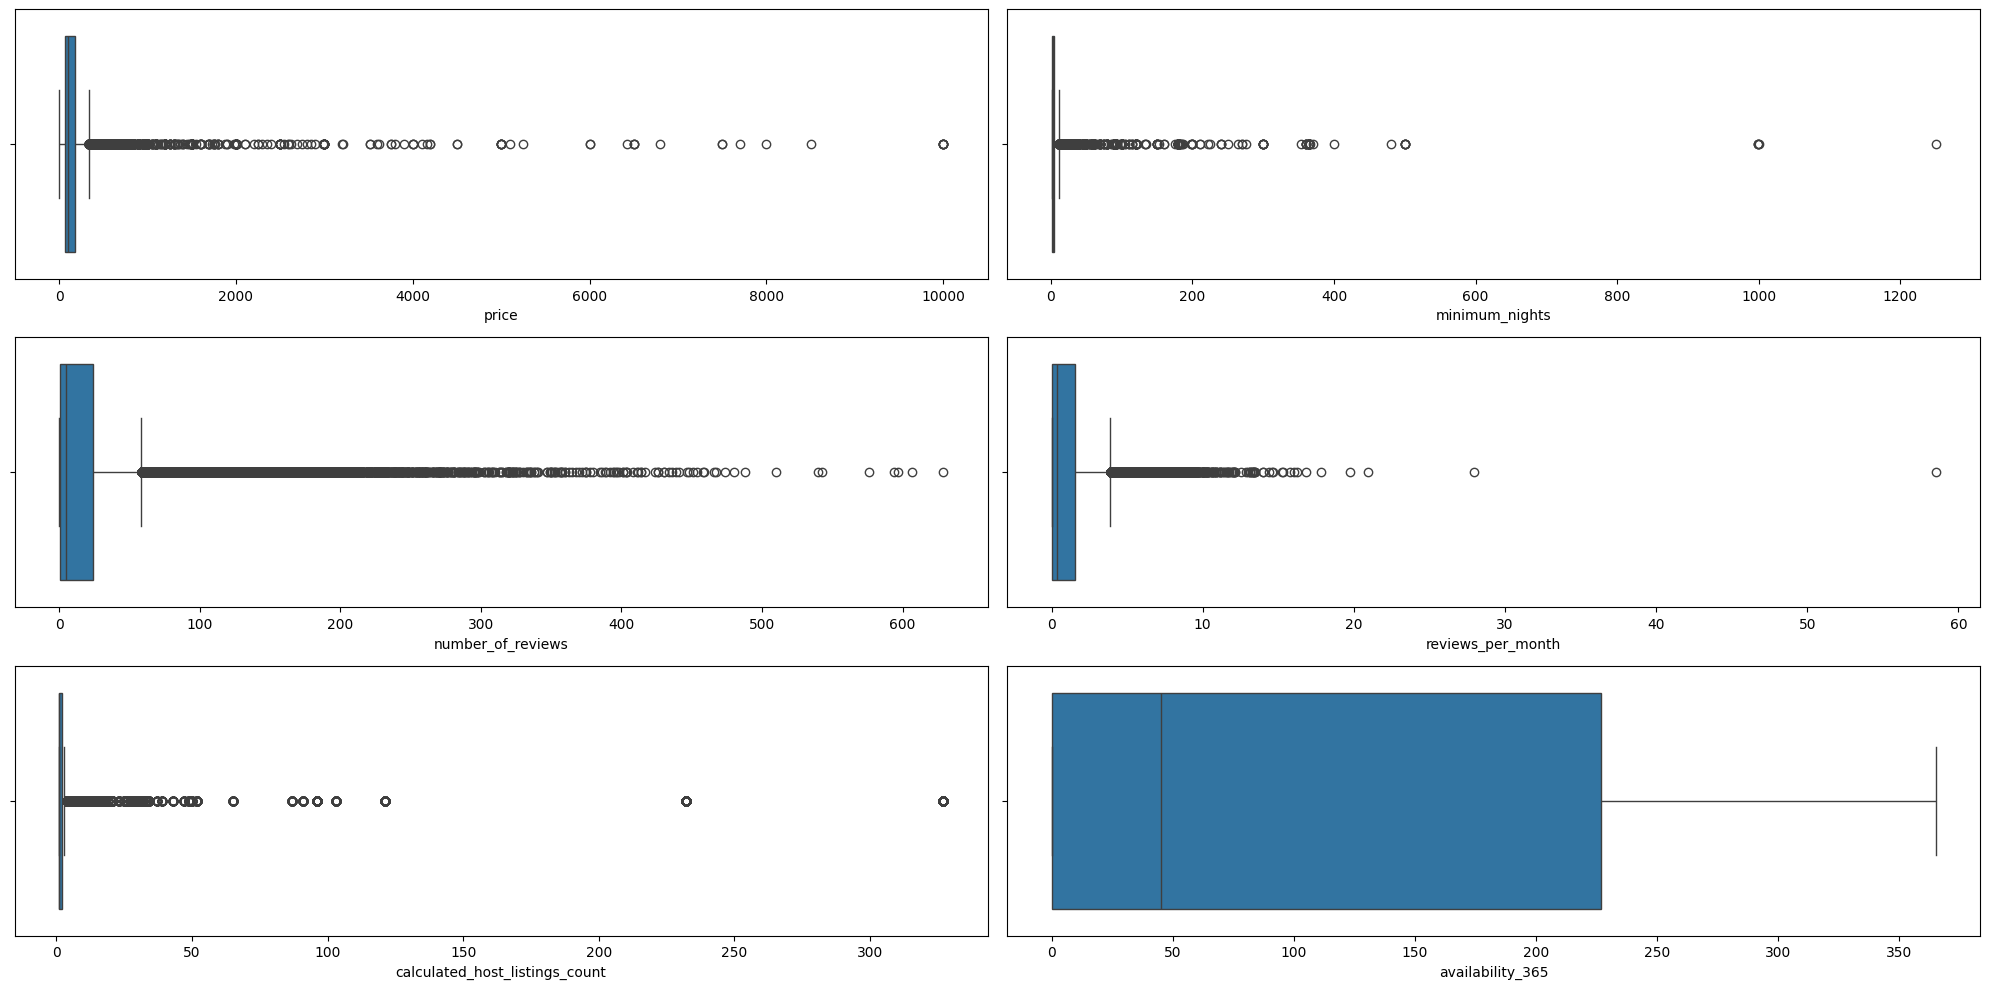

In [17]:
# put in list all the continuous variables
num_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

# identifying outliers
fig, axes = plt.subplots(3,2, figsize=(20,10))

# flattening the 2D array into a 1D array 
axes = axes.flatten()

for i,variables in enumerate(num_cols):
    sns.boxplot(ax=axes[i], data = airbnb, x = variables)
    
plt.tight_layout()
plt.show()

In [18]:
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
            'availability_365']

for col in num_cols:
    percentile_99 = airbnb[col].quantile(0.99)
    outliers_above_99th_percentile = airbnb[airbnb[col] > percentile_99].shape[0]
    print(f"Number of outliers above the 99th percentile for {col}: {outliers_above_99th_percentile}")

Number of outliers above the 99th percentile for price: 474
Number of outliers above the 99th percentile for minimum_nights: 469
Number of outliers above the 99th percentile for number_of_reviews: 480
Number of outliers above the 99th percentile for reviews_per_month: 486
Number of outliers above the 99th percentile for calculated_host_listings_count: 327
Number of outliers above the 99th percentile for availability_365: 0


In [19]:
# capping the ouliers at 99th percentile
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
            'availability_365']

for col in num_cols:
    percentile_99 = airbnb[col].quantile(0.99)
    airbnb[col] = np.where(airbnb[col] > percentile_99, percentile_99, airbnb[col])

In [20]:
airbnb['calculated_host_listings_count'].unique()

array([  6.,   2.,   1.,   4.,   3.,   5.,   7.,  13.,  28.,  11.,   8.,
         9.,  52.,  18.,  15.,  19.,  10.,  39.,  26.,  29.,  12.,  21.,
        96.,  14.,  34.,  43., 121.,  37.,  49.,  31.,  91.,  16.,  87.,
        33.,  23.,  50.,  20.,  25., 232.,  17.,  47., 103.,  65.,  30.,
        27.,  32.])

In [21]:
# above 200 listings look like outliers
airbnb = airbnb[airbnb['calculated_host_listings_count'] < 200]

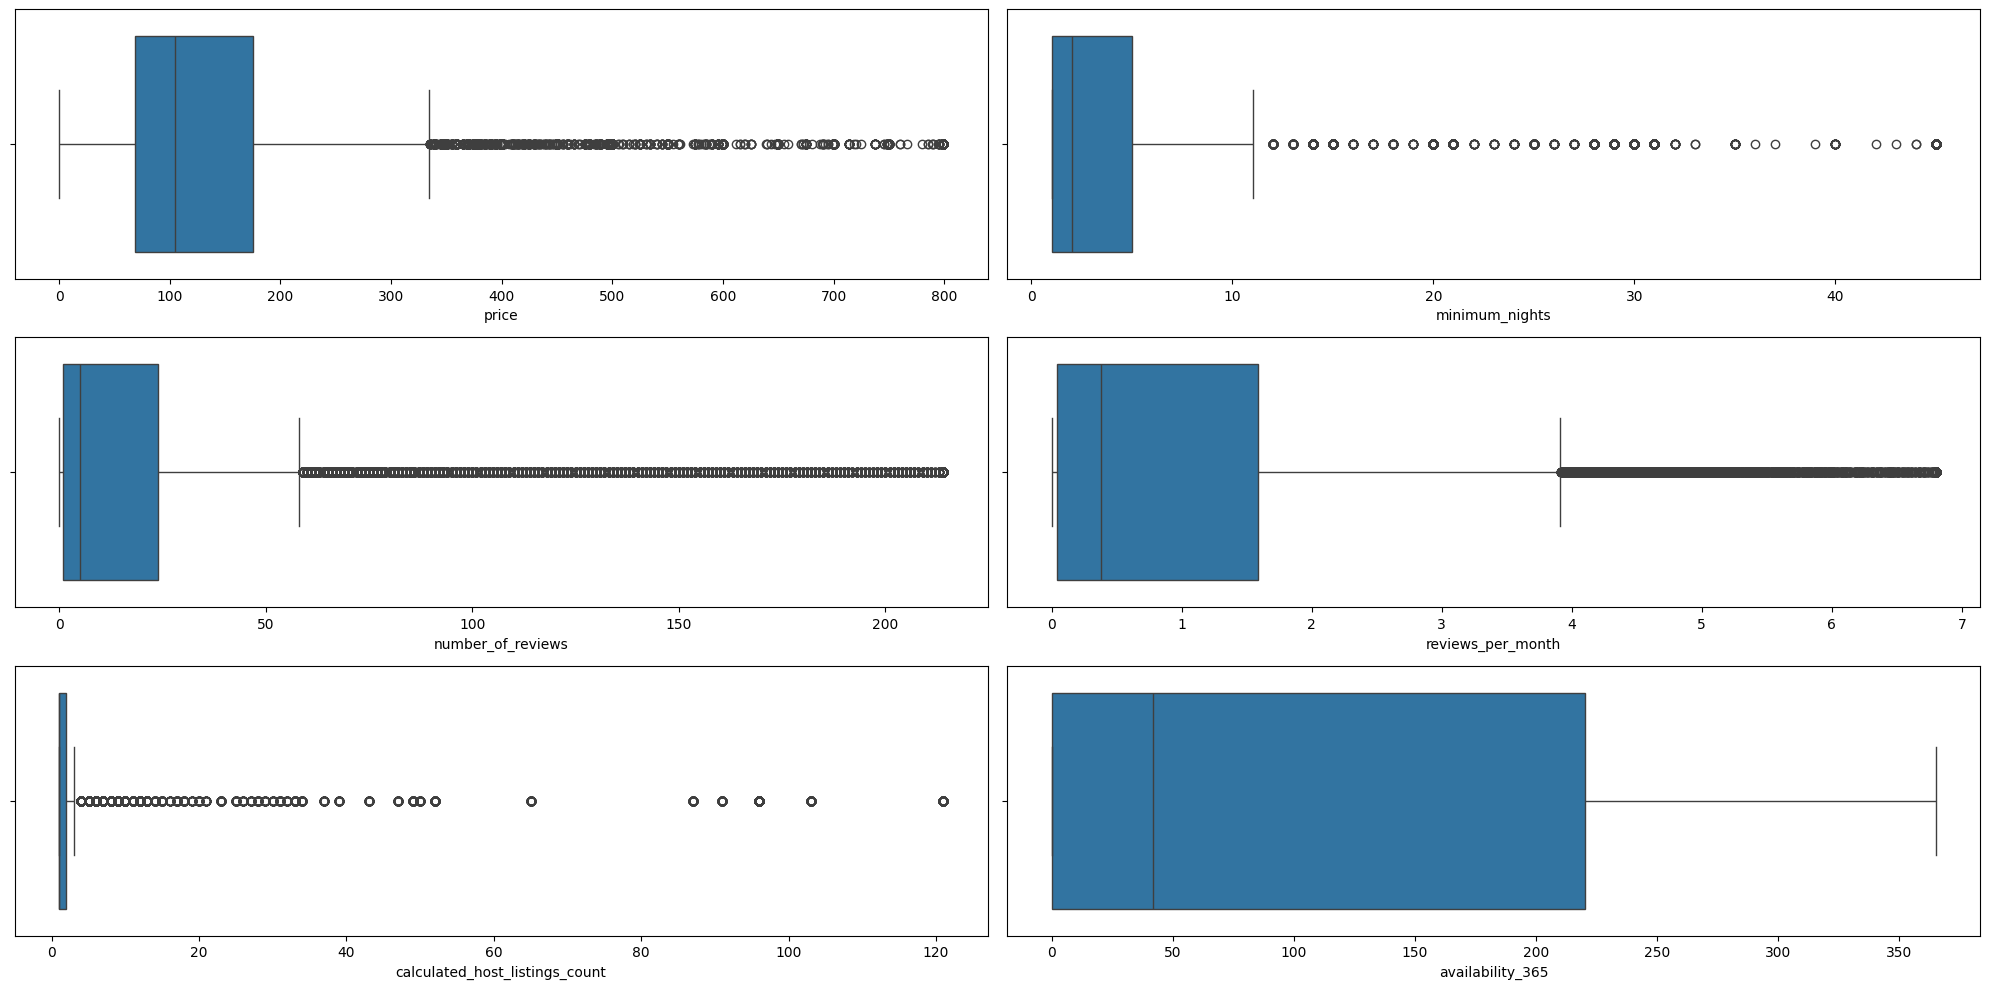

In [22]:
# put in list all the continuous variables
num_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

# identifying outliers
fig, axes = plt.subplots(3,2, figsize=(20,10))

# flattening the 2D array into a 1D array 
axes = axes.flatten()

for i,variables in enumerate(num_cols):
    sns.boxplot(ax=axes[i], data = airbnb, x = variables)
    
plt.tight_layout()
plt.show()

In [23]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [24]:
# converting 'minimum_nights' into categorical column
bins = [0, 5, 10, 15, 30, airbnb['minimum_nights'].max()]
labels = ['1-5', '6-10', '11-15', '16-30', '31+']

airbnb['mini_nights_bins'] = pd.cut(airbnb['minimum_nights'], bins=bins, labels=labels)

In [25]:
airbnb.head(4)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,mini_nights_bins
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0,1-5
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0,1-5


In [27]:
airbnb.shape

(48336, 13)

In [26]:
airbnb.to_csv("airbnb_cleanedDS.csv", index=False)